In [295]:
from scipy.sparse import *
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import pandas as pd
import nltk 
import pickle 
import re

from os import path
from wordcloud import WordCloud
pd.options.mode.chained_assignment = None  # default='warn'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# I) Word Cloud

## A) Generate a word cloud based on the raw corpus 


We first load the csv file containing all the datas and focus on our raw corpus, i.e ExtractedBodyText + ExtractedSubject, to create a Word Cloud without any preprocessing. 


In [307]:
emails=pd.read_csv('/Users/KamilBelkhayat/Desktop/ada/Labs-master/05 - Taming Text/hillary-clinton-emails/Emails.csv')
del emails['Id']

To do so, we will create a new columns BodyandSubject containing our two desired columns concatenated. We will obviously consider the nan as '' to avoid errors.
Our Word Cloud library takes only string as input so we have to manage to convert our column emails.BodyandSubject into a a string list


In [308]:
emails['BodyandSubject']=emails['ExtractedSubject'].fillna('') + ' '+ emails['ExtractedBodyText'].fillna('')
#using ' '.join we join together every bloc contained between two '' 
BodyandSubject_str= ' '.join(list(emails.BodyandSubject))
#type(BodyandSubject_str)
emails

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,BodyandSubject
0,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,FW: Wow
1,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"B6\nThursday, March 3, 2011 9:45 PM\nH: Lates..."
2,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,Re: Chris Stevens Thx
3,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,FVV: Cairo Condemnation - Final
4,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"H <hrod17@clintonemail.com>\nFriday, March 11..."
5,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,HRC_Email_296,...,NaN,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,Meet The Right Wing Extremist Behind Anti-Musl...
6,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,HRC_Email_296,...,"Mills, Cheryl D <MillsCD@state.gov>",NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,"FW: Anti-Muslim film director in hiding, follo..."
7,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,HRC_Email_296,...,NaN,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"H <hrod17@clintonemail.corn>\nFriday, March 1..."
8,C05739562,SECRETARY'S REMARKS,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739562...,F-2015-04841,HRC_Email_296,...,"Sullivan, Jacob J <Sullivanli@stategov>",

We hence generate our raw Word Cloud and display it


(-0.5, 399.5, 199.5, -0.5)

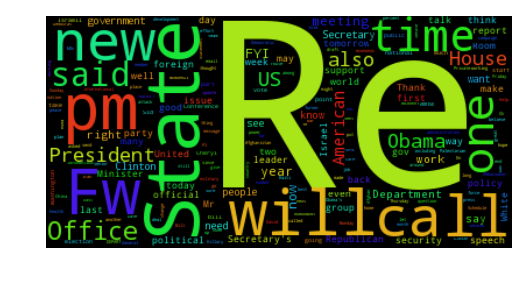

In [309]:
wordcloud = WordCloud().generate(BodyandSubject_str)


# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud)
plt.axis("off")



We can already see the consequences of an unpre-processed raw text: Some words as 'Re' or 'Fw' specific to the mailing vocabulary obviously appear as very frequent even if that doesnt make any sense.

## B) Generate a word cloud based on a preprocessed corpus 

Preprocessing method plays a very important role intext mining techniques and applications. It is the first step in the text mining process. We will implement the key steps of preprocessing namely: extraction, stop words removal, stemming and TF/IDF algorithms

reference : http://pages.cs.wisc.edu/~jerryzhu/cs769/text_preprocessing.pdf

## Instead of working on the extracted features, we will clean the raw text by ourself using the method clean

### Extraction : tokenize the content into individual word

In [5]:
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import wordpunct_tokenize

In [297]:
def clean(text):
    text = text.replace('\n'," ") #remove line break
    text = re.sub(r"-", " ", text) #replace hypens with space
    text = re.sub(r"\d+/\d+/\d+", "", text) #remove date
    text = re.sub(r"[0-2]?[0-9]:[0-6][0-9]", "", text) #remove times
    text = re.sub(r"[\w]+@[\.\w]+", "", text) #remove email addresses
    text = re.sub(r"/[a-zA-Z]*[:\//\]*[A-Za-z0-9\-_]+\.+[A-Za-z0-9\.\/%&=\?\-_]+/i", "", text) #removes web addresses
    clndoc = ''
    for letter in text:
        if letter.isalpha() or letter==' ':
            clndoc+=letter
    text = ' '.join(word for word in clndoc.split() if len(word)>1)
    return text

In [312]:
rawtext= ' '.join(list(emails.RawText))
clean_text=clean(rawtext)
tokens=wordpunct_tokenize(clean_text)


In [313]:
tokens

['UNCLASSIFIED',
 'US',
 'Department',
 'of',
 'State',
 'Case',
 'No',
 'Doc',
 'No',
 'Date',
 'STATE',
 'DEPT',
 'PRODUCED',
 'TO',
 'HOUSE',
 'SELECT',
 'BENGHAZI',
 'COMM',
 'SUBJECT',
 'TO',
 'AGREEMENT',
 'ON',
 'SENSITIVE',
 'INFORMATION',
 'REDACTIONS',
 'NO',
 'FOIA',
 'WAIVER',
 'RELEASE',
 'IN',
 'FULL',
 'From',
 'Sullivan',
 'Jacob',
 'Sent',
 'Wednesday',
 'September',
 'AM',
 'To',
 'Subject',
 'FW',
 'Wow',
 'From',
 'Brose',
 'Christian',
 'Armed',
 'Services',
 'mailto',
 'servicessenategovi',
 'Sent',
 'Wednesday',
 'September',
 'AM',
 'To',
 'Sullivan',
 'Jacob',
 'Subject',
 'Wow',
 'What',
 'wonderful',
 'strong',
 'and',
 'moving',
 'statement',
 'by',
 'your',
 'boss',
 'please',
 'tell',
 'her',
 'how',
 'much',
 'Sen',
 'McCain',
 'appreciated',
 'it',
 'Me',
 'too',
 'UNCLASSIFIED',
 'US',
 'Department',
 'of',
 'State',
 'Case',
 'No',
 'Doc',
 'No',
 'Date',
 'STATE',
 'DEPT',
 'PRODUCED',
 'TO',
 'HOUSE',
 'SELECT',
 'BENGHAZI',
 'COMM',
 'SUBJECT',
 'TO

### Stop Words & Punctiation Elimination

Stop words are a division of natural language. The motive that stop-words should be removed from a text is that they make the text look heavier and less important for analysis. Removing stop words reduces the dimensionality of term space. The most common words in text documents are articles, prepositions, and pro-nouns, etc. that does not give the meaning of the documents. These words are treated as stop words. Example for stop words: the, in, a, an, with, etc. 

Now we need to remove stop words from our tokens. The easiest way to do this consists in removing stop words obtained from pre-compiled lists. We will use an external library to download our stop word list : https://pypi.python.org/pypi/stop-words#basic-usage

In [377]:
from stop_words import get_stop_words

stopwords = get_stop_words('en')
#add few mailing lexicon to the list
stopwords.append('fw')
stopwords.append('re')
stopwords.append('pm')
stopwords.append('cc')
stopwords.append('h')
stopwords.append('fwd')
stopwords.append('docx')
stopwords.append('fvv')
stopwords.append('fyi')
stopwords.append('sent')
stopwords.append('release')
stopwords.append('subject')
stopwords.append('doc')
stopwords.append('mailto')
stopwords.append('year')
stopwords.append('time')
stopwords.append('date')
stopwords.append('message')
stopwords.append('case')
stopwords.append('original')
stopwords.append('monday')
stopwords.append('thuesday')
stopwords.append('wednesday')
#we remove us as it is used for mails only, we will see later that we wont use alpha2 representation anyways
stopwords.append('us')
stopwords.append('unclassified')
stopwords.append('thursday')
stopwords.append('friday')
stopwords.append('department')
stopwords.append('saturday')
stopwords.append('sunday')
stopwords.append('dept')
stopwords.append('httpwwvvti')
stopwords.append('httpwwwalzaytounanetarabicca')
stopwords.append('httpnvmagcornnewspoliticspowergrid')
stopwords.append('httptimesonlineglobrixcom')
stopwords.append('httpwwwamazoncomgpgoldboxrefcstopnavgb')
stopwords.append('httpmultivuprnewswirecommnradcouncil')
stopwords.append('httpblogsusatodaycomopedforeignaffairslatinamericaforumh')
stopwords.append('httpwwwpoliticocomnewsstoriesoohtml')
stopwords.append('ashingtondcsourceevitepageidzippsgloginaamszxemailsiteevitecomaccr')
stopwords.append('httpfiwwwunorgwebcastm')
stopwords.append('httpmageseventgifescnyreecmostviewedeenvprodeidfafac')
stopwords.append('hdontbotherjpg')
stopwords.append('httpwwwsipriorgresearcharmamentsmilexresultoutputtrends')
stopwords.append('httpwwwthenationcomarticlemideast')

#make sure to remove duplicates
stopwords=list(set(stopwords))

print('Stopwords list ready')

#convert our alpha_tokens list in lower characters
for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
    
print('Tokens converted in low char')

#create a list without stopwords
tokens_nosw= []
for word in tokens:
    if word not in stopwords:
        tokens_nosw.append(word)
    else:
        continue
print('List of tokens without stopwords ready')

Stopwords list ready
Tokens converted in low char
List of tokens without stopwords ready


In [378]:
tokens_nosw

['state',
 'state',
 'produced',
 'house',
 'select',
 'benghazi',
 'comm',
 'agreement',
 'sensitive',
 'information',
 'redactions',
 'foia',
 'waiver',
 'full',
 'sullivan',
 'jacob',
 'september',
 'wow',
 'brose',
 'christian',
 'armed',
 'services',
 'servicessenategovi',
 'september',
 'sullivan',
 'jacob',
 'wow',
 'wonderful',
 'strong',
 'moving',
 'statement',
 'boss',
 'please',
 'tell',
 'much',
 'sen',
 'mccain',
 'appreciated',
 'state',
 'state',
 'produced',
 'house',
 'select',
 'benghazi',
 'comm',
 'agreement',
 'sensitive',
 'information',
 'redactions',
 'foia',
 'waiver',
 'state',
 'cb',
 'state',
 'state',
 'produced',
 'house',
 'select',
 'benghazi',
 'comm',
 'agreement',
 'sensitive',
 'information',
 'redactions',
 'foia',
 'waiver',
 'part',
 'attachments',
 'march',
 'latest',
 'syria',
 'aiding',
 'qaddafi',
 'sid',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 'hrc',
 'memo',
 'syria',
 'aiding',
 'libya',
 'confidential',
 'march',
 'hillary',
 'si

We can see that we just removed half  of our tokens by removing the useless stopwords

In [379]:
print(len(tokens_nosw))
print(len(tokens))

1426392
2718425


We can hence see the Word cloud without stop words and punctuation

(-0.5, 399.5, 199.5, -0.5)

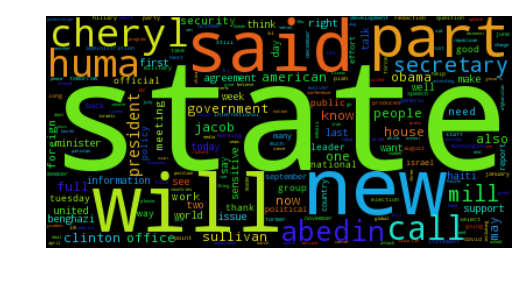

In [380]:
tokens_nosw_str= ' '.join(tokens_nosw)
wordcloud_nosw = WordCloud().generate(tokens_nosw_str)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_nosw)
plt.axis("off")



We can already have some great insights : abedin is listed many times, referencing to Huma Abedin who is a political advisor,Cheryl for Cheryl Mills which is Hilary Clinton's lawyer, sullivan also referencing Jake Sullivan. Obama's name is also cited many time, Benghazi as well..

### Stemming ( Lemmatization)


This method is used to identify the root/stem of a word. For example, the words pay, payed, paying all can be stemmed to the word “pay”. The purpose of this method is to remove various suffixes, to reduce the number of words, to have accurately matching stems, to save time and memory space.

we will use the nltk package to do so http://www.nltk.org/api/nltk.stem.html

In [381]:
from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()

In [382]:
stemmed_tokens=[]
for word in tokens_nosw:
    stemmed_tokens.append(st.stem(word))
stemmed_tokens

['stat',
 'stat',
 'produc',
 'hous',
 'select',
 'benghaz',
 'com',
 'agr',
 'sensit',
 'inform',
 'redact',
 'foi',
 'waiv',
 'ful',
 'sul',
 'jacob',
 'septemb',
 'wow',
 'bros',
 'christian',
 'arm',
 'serv',
 'servicessenategov',
 'septemb',
 'sul',
 'jacob',
 'wow',
 'wond',
 'strong',
 'mov',
 'stat',
 'boss',
 'pleas',
 'tel',
 'much',
 'sen',
 'mccain',
 'apprecy',
 'stat',
 'stat',
 'produc',
 'hous',
 'select',
 'benghaz',
 'com',
 'agr',
 'sensit',
 'inform',
 'redact',
 'foi',
 'waiv',
 'stat',
 'cb',
 'stat',
 'stat',
 'produc',
 'hous',
 'select',
 'benghaz',
 'com',
 'agr',
 'sensit',
 'inform',
 'redact',
 'foi',
 'waiv',
 'part',
 'attach',
 'march',
 'latest',
 'syr',
 'aid',
 'qaddaf',
 'sid',
 'hrc',
 'memo',
 'syr',
 'aid',
 'liby',
 'hrc',
 'memo',
 'syr',
 'aid',
 'liby',
 'confid',
 'march',
 'hil',
 'sid',
 'syr',
 'aid',
 'qaddaf',
 'memo',
 'two',
 'part',
 'part',
 'on',
 'report',
 'syr',
 'provid',
 'air',
 'support',
 'qaddaf',
 'part',
 'two',
 'not',
 

We can finally see the Word Cloud with the stemmed words, which makes less sens than the precedent because we truncated the words but still

(-0.5, 399.5, 199.5, -0.5)

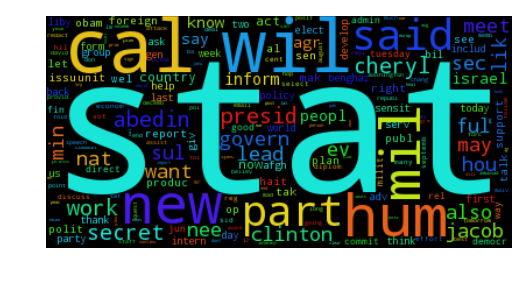

In [383]:
stemmed_tokens_str= ' '.join(stemmed_tokens)
wordcloud_clean = WordCloud().generate(stemmed_tokens_str)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud_clean)
plt.axis("off")



# II) Find all the mentions of world countries in the whole corpus

### A) Using Vader

The first step is to pre process each email. We are going to follow the same pipeline as in I) except that we are not going to stem as it may bring confusion by associating two words that dont have the same meaning but have similarity in the syntaxe as "departure" and "department" both stemmed as "depart"

In [384]:
print(st.stem('departure'))
print(st.stem('department'))

depart
depart


To do so, we are going to implement one generic function that tokenize, remove stop words, punctuation and transform in low characters

In [389]:
 def preprocess(x):
    from stop_words import get_stop_words

    clean_x=clean(x)
    tokens=wordpunct_tokenize(clean_x)    
    alpha_tokens=[]

    stopwords = get_stop_words('en')
    #add few mailing lexicon to the list
    stopwords.append('fw')
    stopwords.append('re')
    stopwords.append('pm')
    #we remove us as it is used for mails only, we will see later that we wont use alpha2 representation anyways
    stopwords.append('us')
    stopwords.append('cc')
    stopwords.append('h')
    stopwords.append('fwd')
    stopwords.append('docx')
    stopwords.append('fvv')
    stopwords.append('fyi')
    stopwords.append('sent')
    stopwords.append('release')
    stopwords.append('subject')
    stopwords.append('doc')
    stopwords.append('mailto')
    stopwords.append('year')
    stopwords.append('time')
    stopwords.append('date')
    stopwords.append('message')
    stopwords.append('case')
    stopwords.append('original')
    stopwords.append('monday')
    stopwords.append('thuesday')
    stopwords.append('unclassified')
    stopwords.append('wednesday')
    stopwords.append('thursday')
    stopwords.append('friday')
    stopwords.append('saturday')
    stopwords.append('sunday')
    stopwords.append('department')
    stopwords.append('httpwwvvti')
    stopwords.append('httpwwwalzaytounanetarabicca')
    stopwords.append('httpnvmagcornnewspoliticspowergrid')
    stopwords.append('dept')
    stopwords.append('httptimesonlineglobrixcom')
    stopwords.append('httpwwwamazoncomgpgoldboxrefcstopnavgb')
    stopwords.append('httpmultivuprnewswirecommnradcouncil')
    stopwords.append('httpblogsusatodaycomopedforeignaffairslatinamericaforumh')
    stopwords.append('httpwwwpoliticocomnewsstoriesoohtml')
    stopwords.append('ashingtondcsourceevitepageidzippsgloginaamszxemailsiteevitecomaccr')
    stopwords.append('httpfiwwwunorgwebcastm')
    stopwords.append('httpmageseventgifescnyreecmostviewedeenvprodeidfafac')
    stopwords.append('hdontbotherjpg')
    stopwords.append('httpwwwsipriorgresearcharmamentsmilexresultoutputtrends')
    stopwords.append('httpwwwthenationcomarticlemideast')

#make sure to remove duplicates
    stopwords=list(set(stopwords))


#convert our tokens list in lower characters
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    

#create a list without stopwords
    tokens_nosw= []
    for word in tokens:
        if word not in stopwords:
            tokens_nosw.append(word)
        else:
            continue
    tokens_nosw_str=' '.join(tokens_nosw)
    
    return tokens_nosw_str
    

Our preprocessedmails Columns will contain extracted bodytext + extracted subject preprocessed

In [390]:
emails['preprocessedmails']=emails.RawText.apply(preprocess)

In [391]:
emails

,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,MetadataDocumentClass,...,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText,BodyandSubject,preprocessedmails
0,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,HRC_Email_296,...,NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,FW: Wow,state state produced house select benghazi com...
1,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,HRC_Email_296,...,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...,"B6\nThursday, March 3, 2011 9:45 PM\nH: Lates...",state state produced house select benghazi com...
2,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,HRC_Email_296,...,"Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...,Re: Chris Stevens Thx,state state produced house select benghazi com...
3,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,HRC_Email_296,...,"Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,FVV: Cairo Condemnation - Final,state state produced house select benghazi com...
4,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,HRC_Email_296,...,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"H <hrod17@clintonemail.com>\nFriday, March 11...",state state produced house select benghazi com...
5,C05739559,MEET THE RIGHT-WING EXTREMIST BEHIND ANTI-MUSL...,Russorv@state.gov,H,80.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739559...,F-2015-04841,HRC_Email_296,...,NaN,"Wednesday, September 12, 2012 01:00 PM",F-2015-04841,C05739559,05/13/2015,RELEASE IN PART,Pis print.\n-•-...-^\nH < hrod17@clintonernail...,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,Meet The Right Wing Extremist Behind Anti-Musl...,state state produced house select benghazi com...
6,C05739560,"ANTI-MUSLIM FILM DIRECTOR IN HIDING, FOLLOWING...",H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739560...,F-2015-04841,HRC_Email_296,...,NaN,"Wednesday, September 12, 2012 4:00 PM",F-2015-04841,C05739560,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...,"FW: Anti-Muslim film director in hiding, follo...",state state produced house select benghazi com...
7,C05739561,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739561...,F-2015-04841,HRC_Email_296,...,NaN,NaN,F-2015-04841,C05739561,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.corn>\nFriday, March 11...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,"H <hrod17@clintonemail.corn>\nFriday, March 1...",state state produced house select benghazi com...
8,C

The next step is to perform sentiment analysis on every preprocessed email message using the demo methods in the nltk.sentiment.util module.

In [392]:
# we import the  package  for polarity
from nltk.sentiment.util import demo_vader_instance


In [393]:
emails_polarity= emails.loc[:,['RawText','preprocessedmails']]
print(type(demo_vader_instance(emails_polarity.preprocessedmails[0])))


{'pos': 0.372, 'neu': 0.628, 'neg': 0.0, 'compound': 0.979}
<class 'NoneType'>


As the two function return a NoneType, we are going to change their source code in order to return us a list of positive, negative and neutral

In [398]:

def demo_vader_instance_mod(text):
    """
    Output polarity scores for a text using Vader approach.

    :param text: a text whose polarity has to be evaluated.
    """
    from nltk.sentiment import SentimentIntensityAnalyzer
    vader_analyzer = SentimentIntensityAnalyzer()

    map=vader_analyzer.polarity_scores(text)
    score=map.get('compound')
    return score


We hence create our dataframe of polarized mails

In [403]:
polarity=emails_polarity.preprocessedmails.apply(demo_vader_instance_mod)

emails_polarity['Score']=polarity

emails_polarity.head()

,RawText,preprocessedmails,Score
0,UNCLASSIFIED\nU.S. Department of State\nCase N...,state state produced house select benghazi com...,0.9790
1,UNCLASSIFIED\nU.S. Department of State\nCase N...,state state produced house select benghazi com...,0.9947
2,UNCLASSIFIED\nU.S. Department of State\nCase N...,state state produced house select benghazi com...,0.8591
3,UNCLASSIFIED\nU.S. Department of State\nCase N...,state state produced house select benghazi com...,-0.6908
4,B6\nUNCLASSIFIED\nU.S. Department of State\nCa...,state state produced house select benghazi com...,0.9957


The next step is to work with the countries, we will first transform the names in lower character and then implement three lists of countries with the same indexing containing the names representation, alpha2 representation and alpha3 representation

In [406]:
import pycountry


countries= list(pycountry.countries)
for c in countries:
    c.name=c.name.lower()
    if  hasattr(c, 'official_name'):
        c.official_name = c.official_name.lower()
    if  hasattr(c, 'alpha_2'):
        c.alpha_2=c.alpha_2.lower()
    if  hasattr(c, 'alpha_3'):
        c.alpha_3=c.alpha_3.lower()

#We implement 3 lists with countries attribute in the same order : i.e names[0]=alpha2[0]=alpha3[0] in order to 
#retrieve the name if we have the alpha2 representation
names=[]
for i in range(len(countries)):
    names.append(countries[i].name)
alpha2=[]
for i in range(len(countries)):
    alpha2.append(countries[i].alpha_2)
alpha3=[]
for i in range(len(countries)):
    alpha3.append(countries[i].alpha_3)


We hence implement our contries polarity data base containing each countries, its occurence and its positive, negative, neutrale percentage. We then created a new features ' Polarity' which is the compound score of the vader method.
We will not retrieve alpha2 and alpha3 as it generates a lot of  false positive for ex :
###### 'thursday march latest syria aiding qaddafi sid hrc memo syria aiding libya hrc memo syria aiding libya march hillary'
If we check if 'rs' is in this mail it returns True as rs is contained in 'Thursday'


In [408]:
#initializing our dataframe
countries_polarity=pd.DataFrame({'Countries':names})
countries_polarity['Occurence']=0
countries_polarity['Score']=0.000

countries_polarity=countries_polarity.set_index('Countries')

print('DF initialized')


#retrieve names in emails
for i in range(len(emails_polarity)):
    mail=emails_polarity.loc[i]
    prepro=mail.preprocessedmails
    
    #special mapping benghazi --> libya as benghazi seems to be a reccurent subject
    if 'benghazi' in prepro:
        countries_polarity.loc[['libya'],['Occurence']]+=1
        countries_polarity.loc[['libya'],['Score']]+=mail.Score
        
    for c in names:
        if c in prepro:
            countries_polarity.loc[[c],['Occurence']]+=1
            countries_polarity.loc[[c],['Score']]+=mail.Score

print('names OK')
#retrieve alpha 3 in emails and add to our frame
#for i in range(len(emails_polarity)):
#    mail=emails_polarity.loc[i]
#    prepro=mail.preprocessedmails
#    for a in alpha3:
#        if a in prepro:
#            ind = alpha3.index(a)
#            c=names[ind]
#            countries_polarity.loc[[c],['Occurence']]+=1
#           countries_polarity.loc[[c],['Score']]+=mail.Score
#            

#print('alpha3 OK')

#Normalize score
countries_polarity['Score']=countries_polarity['Score']/countries_polarity['Occurence']

print('Normalization OK')


#the na will correspond to the countries that have 0 occurence i.e that appears 0 times
countries_polarity=countries_polarity.dropna()

#implement our polarity_score and sort the table
countries_polarity=countries_polarity.sort_values(by='Score', ascending=False)



print('DATAFRAME IMPLEMENTED ')
countries_polarity.head()

DF initialized
names OK
Normalization OK
DATAFRAME IMPLEMENTED 


,Occurence,Score
Countries,,
western sahara,2,1.00000
central african republic,1,1.00000
brunei darussalam,1,0.99990
samoa,2,0.99585
american samoa,2,0.99585


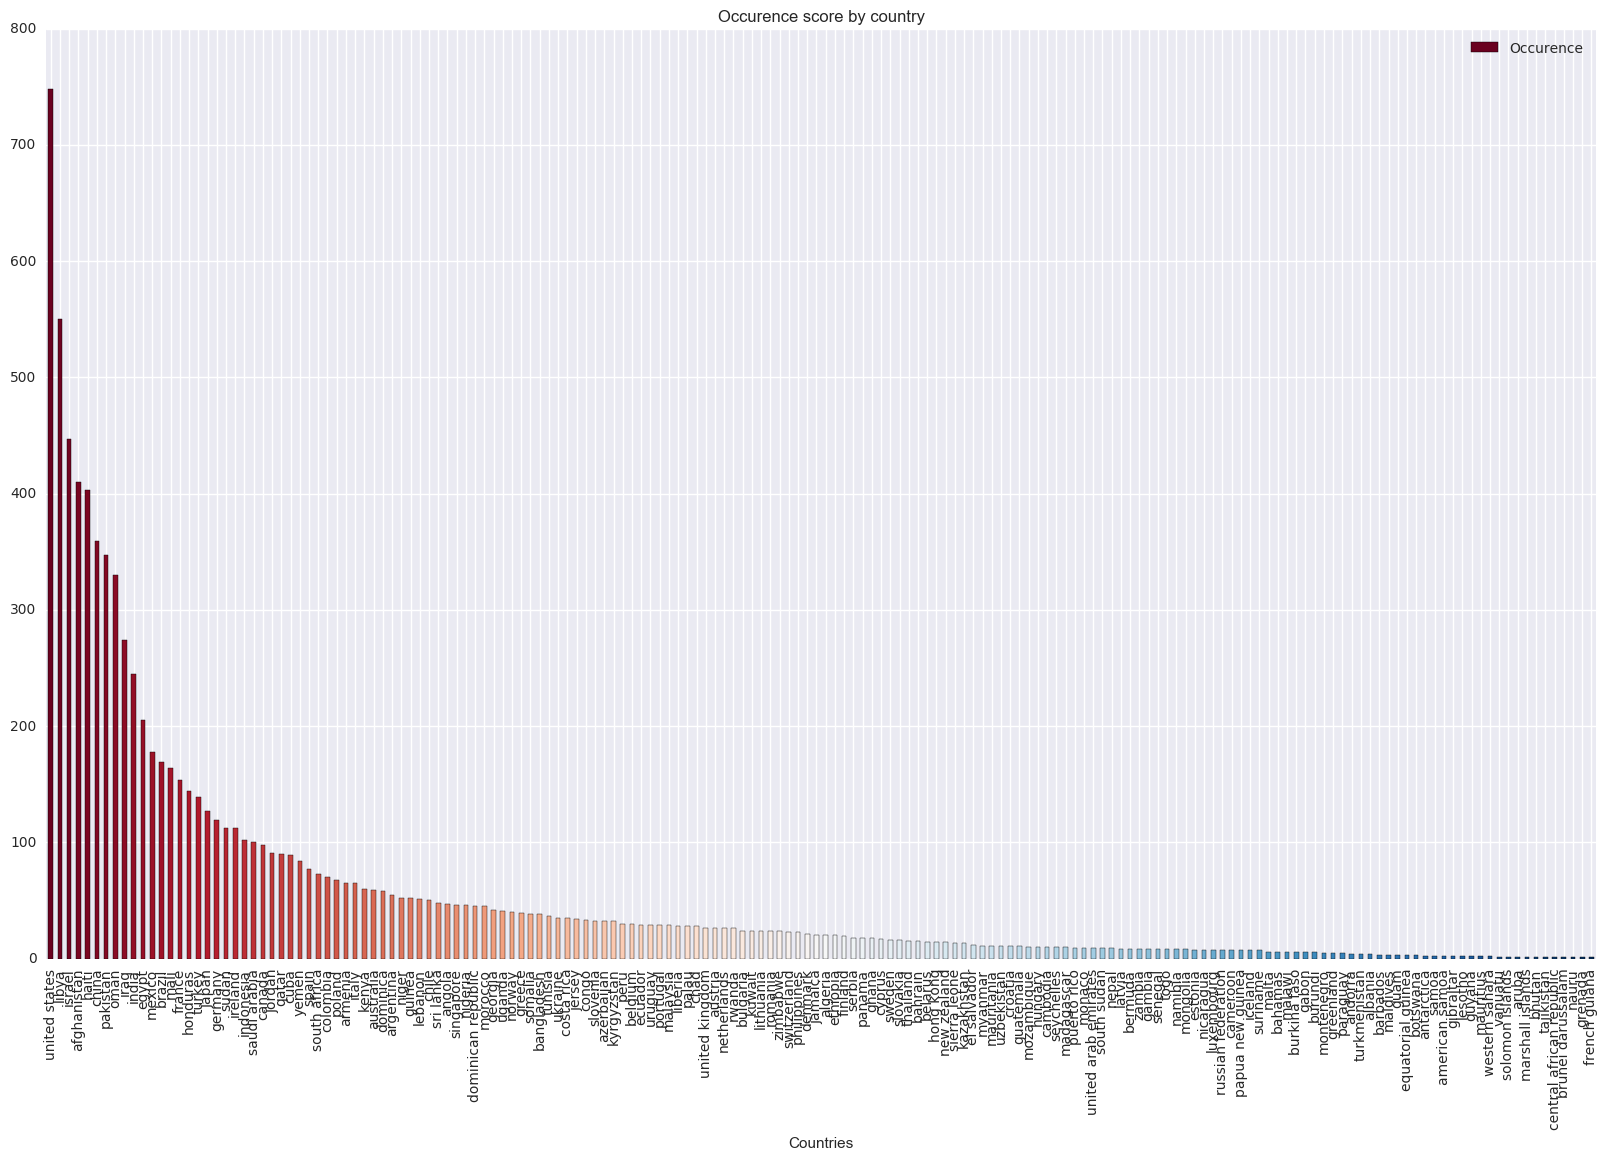

In [409]:
import seaborn as sb

plt.figure(figsize=(20,12))
countries_polarity_oc=countries_polarity.sort_values(by='Occurence', ascending=False)

countries_polarity_oc['Occurence'].plot(kind = 'bar', use_index = True,legend=True,title='Occurence score by country', color  = sb.color_palette("RdBu",len(countries_polarity)))
plt.show()

We can see that the most reccurent countries are :

-United Sttes

-Libya

-Israel 

-Afhanistan

-Haiti

-China

-Pakistan

Which is not very surprising due to the actual context of international relations. 

We can see it more clearly in this zoomed histogram

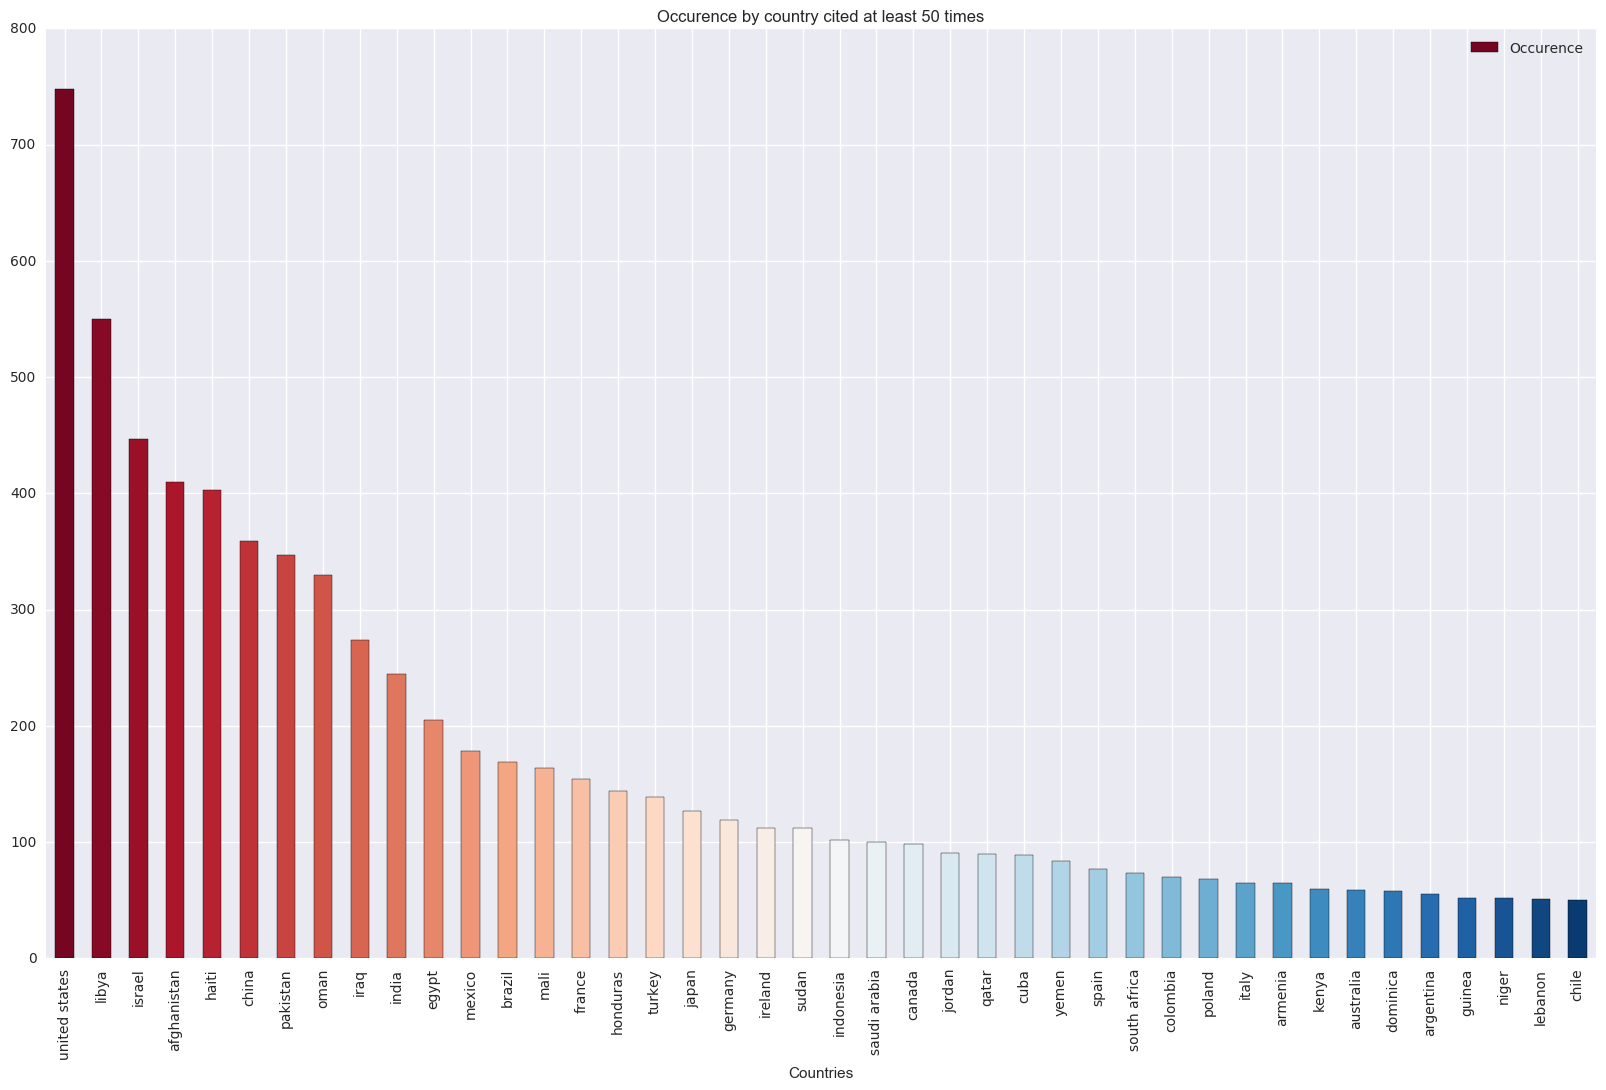

In [412]:
import seaborn as sb

plt.figure(figsize=(20,12))
countries_polarity_oc50=countries_polarity[countries_polarity['Occurence']>= 50]

countries_polarity_oc50=countries_polarity_oc50.sort_values(by='Occurence', ascending=False)

countries_polarity_oc50['Occurence'].plot(kind = 'bar', use_index = True,legend=True,title='Occurence by country cited at least 50 times', color  = sb.color_palette("RdBu",len(countries_polarity_oc50)))
plt.show()

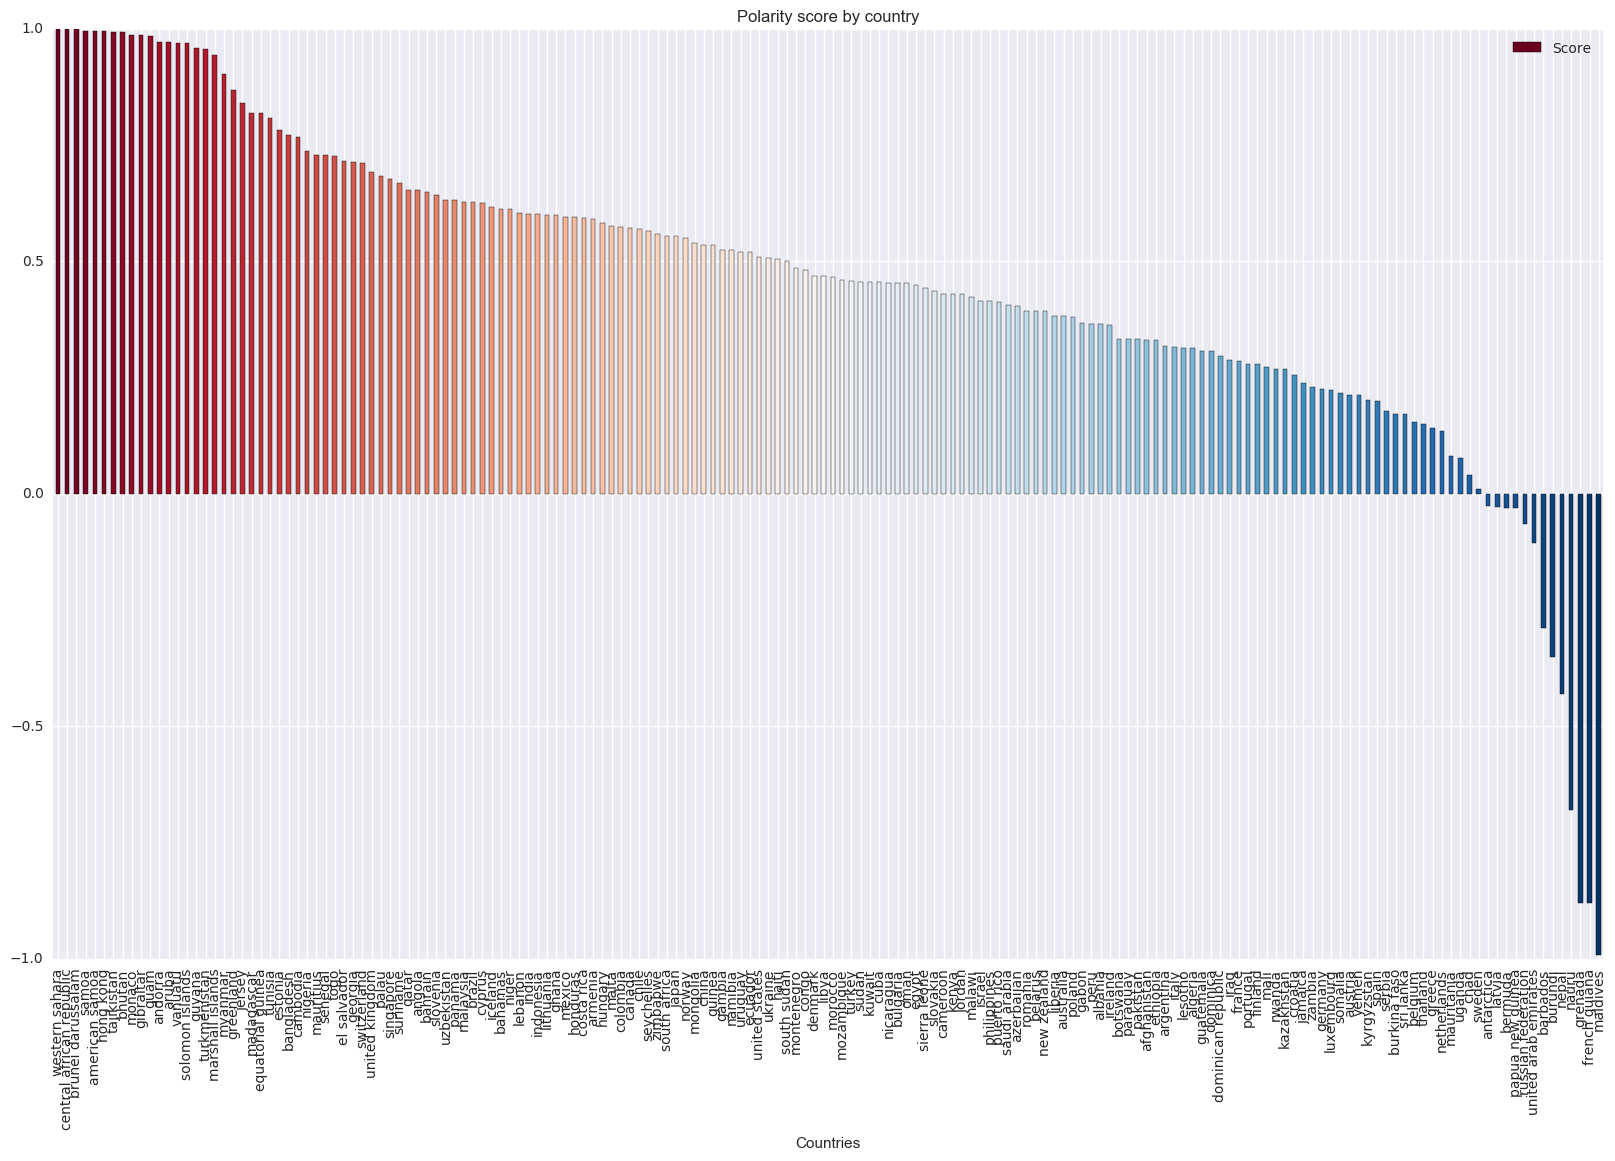

In [414]:
import seaborn as sb

plt.figure(figsize=(20,12))
countries_polarity['Score'].plot(kind = 'bar', use_index = True,legend=True,title='Polarity score by country', color  = sb.color_palette("RdBu",len(countries_polarity)))
plt.show()

To have a more relevant histogram, we will only focus on the countries named at least 100 times

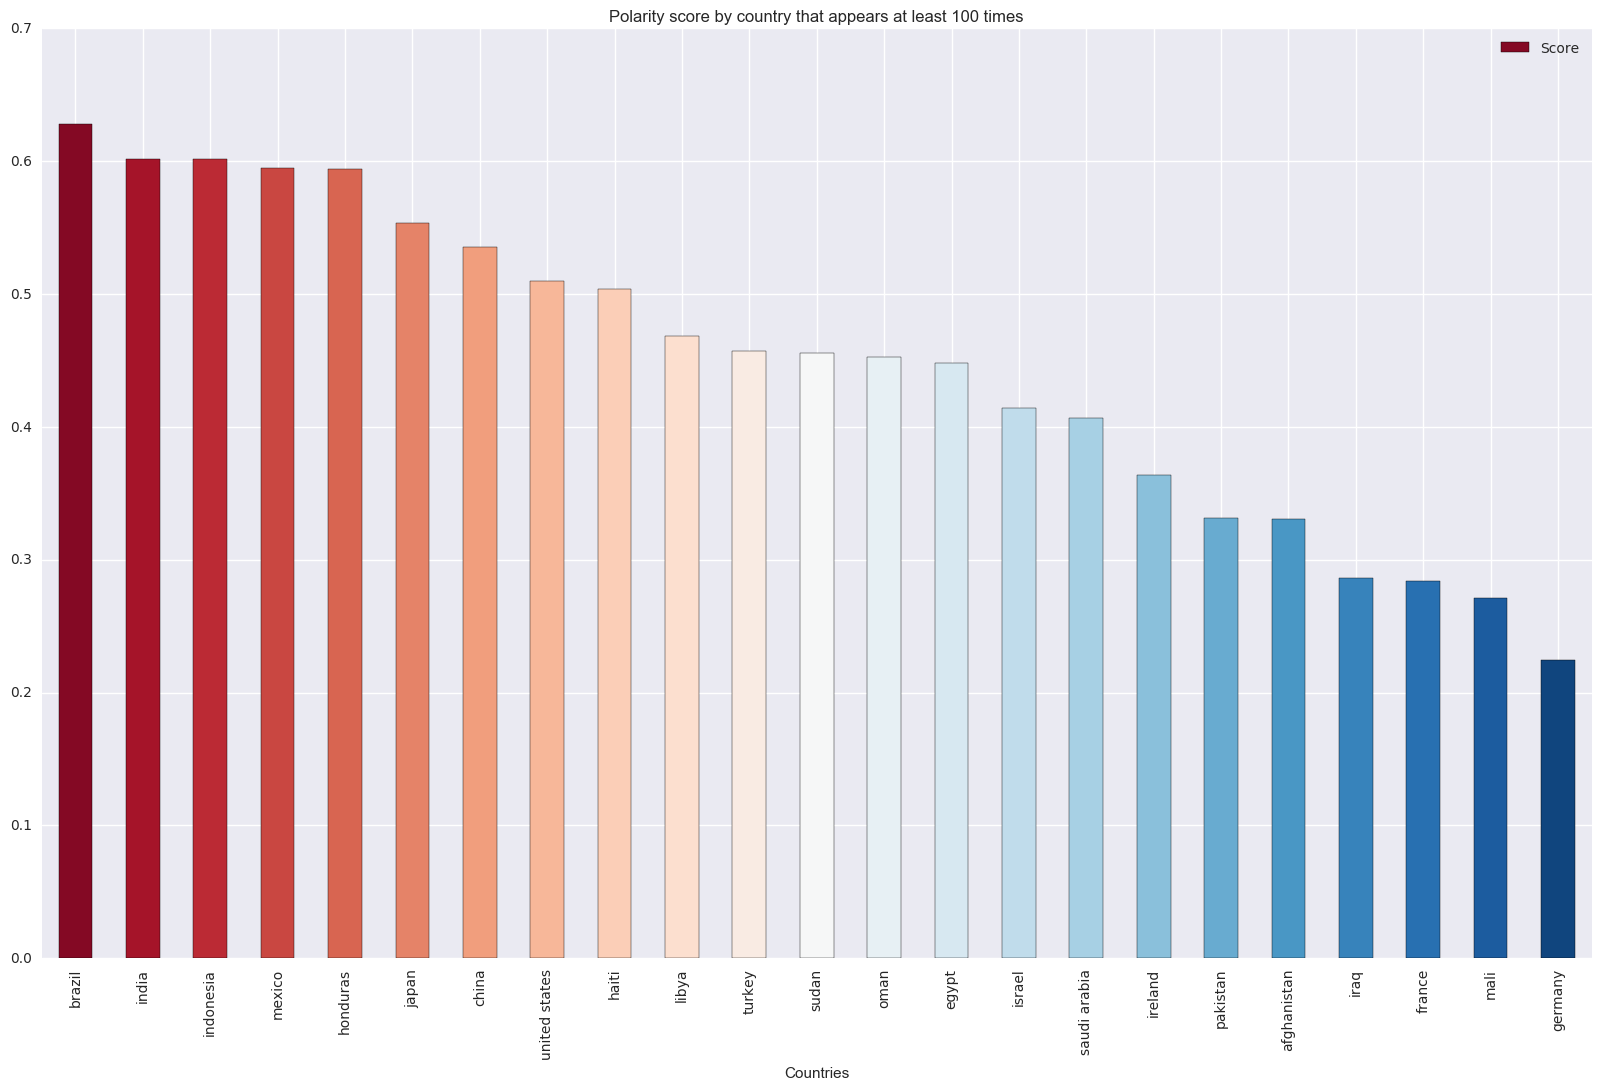

In [417]:
plt.figure(figsize=(20,12))
countries_polarity_ps=countries_polarity[countries_polarity['Occurence']>= 100]
countries_polarity_ps['Score'].plot(kind = 'bar', use_index = True,legend=True,title='Polarity score by country that appears at least 100 times', color  = sb.color_palette("RdBu",len(countries_polarity_ps)))
plt.show()

Our scores seems surprisingly high. This must be due to the fact that the compound score is weirdly computed as we can see in the following example

In [426]:
#it gives a polarity of almost 1 in a scale of -1,1 for a mail that have 0.75% neutral!!!
demo_vader_instance(emails_polarity.preprocessedmails[1])

{'pos': 0.16, 'neu': 0.75, 'neg': 0.09, 'compound': 0.9947}


In [427]:
demo_vader_instance(emails_polarity.preprocessedmails[2])

{'pos': 0.186, 'neu': 0.75, 'neg': 0.063, 'compound': 0.8591}


This can also be explained by the fact that polarity is here defined by mail and not by sentence, which introduce a bias in the polarity of each country.

EXAMPLE: A very long mail could contains 3 topics, one for Israel, one for Brazil and one for Lybia. The global polarity of the mail will be positive even if when talking about Lybia the connotation is negative.

A solution would be to create a word embedding model as word2vec or glove, use a trained classifier and evaluate the polarity of each sentence of all mails and then aggregate the polarities by country.

## B) Using Liu Hu

In [418]:
from nltk.sentiment.util import demo_liu_hu_lexicon
print(type(demo_liu_hu_lexicon(emails_polarity.preprocessedmails[0])))


Positive
<class 'NoneType'>


First of all, we are going to modify the demo_liu_hu_lexicon function so it returns us a String. We can already expect less exact results as the output of this function is trinary : Positive-Neutral-Negative, without weights.

In [419]:
def demo_liu_hu_lexicon_mod(sentence):
    """
    Basic example of sentiment classification using Liu and Hu opinion lexicon.
    This function simply counts the number of positive, negative and neutral words
    in the sentence and classifies it depending on which polarity is more represented.
    Words that do not appear in the lexicon are considered as neutral.

    :param sentence: a sentence whose polarity has to be classified.
    :param plot: if True, plot a visual representation of the sentence polarity.
    """
    from nltk.corpus import opinion_lexicon
    from nltk.tokenize import treebank

    tokenizer = treebank.TreebankWordTokenizer()
    pos_words = 0
    neg_words = 0
    tokenized_sent = [word.lower() for word in tokenizer.tokenize(sentence)]

    x = list(range(len(tokenized_sent))) # x axis for the plot
    y = []

    for word in tokenized_sent:
        if word in opinion_lexicon.positive():
            pos_words += 1
            y.append(1) # positive
        elif word in opinion_lexicon.negative():
            neg_words += 1
            y.append(-1) # negative
        else:
            y.append(0) # neutral

    if pos_words > neg_words:
        return 'Positive'
    elif pos_words < neg_words:
        return 'Negative'
    elif pos_words == neg_words:
        return 'Neutral'


In [420]:
print(type(demo_liu_hu_lexicon_mod(emails_polarity.preprocessedmails[0])))


<class 'str'>


### As it was too slow, to run, we did not implement the Liu Hu method because it would be less precise for a huge computational cost. 
### Please note that we are working on the rawtexts not on the extractedbody+extractedsubject

# III) Using the models.ldamodel module from the gensim library, run topic modeling over the corpus. Explore different numbers of topics (varying from 5 to 50), and settle for the parameter which returns topics that you consider to be meaningful at first sight.

In [421]:
import gensim
from gensim.models.ldamodel import LdaModel

For the topic modelling part, we will refer to this website :
http://www.matthewjockers.net/2013/04/12/secret-recipe-for-topic-modeling-themes/

In [431]:
# The data comes both as CSV files and a SQLite database
import numpy as np
import pandas as pd
import re




docs = emails['preprocessedmails']
docs.head()

doclist = docs.values
stoplist = ['a' 'about' 'above' 'after' 'again' 'against' 'all' 'am' 'an' 'and' 'any'
 'are' "aren't" 'as' 'at' 'be' 'because' 'been' 'before' 'being' 'below'
 'between' 'both' 'but' 'by' 'can' "can't" 'cannot' 'could' "couldn't"
 'did' "didn't" 'do' 'does' "doesn't" 'doing' "don't" 'down' 'during'
 'each' 'few' 'for' 'from' 'further' 'had' "hadn't" 'has' "hasn't" 'have'
 "haven't" 'having' 'he' "he'd" "he'll" "he's" 'her' 'here' "here's" 'hers'
 'herself' 'him' 'himself' 'his' 'how' "how's" 'i' "i'd" "i'll" "i'm"
 "i've" 'if' 'in' 'into' 'is' "isn't" 'it' "it's" 'its' 'itself' "let's"
 'me' 'more' 'most' "mustn't" 'my' 'myself' 'no' 'nor' 'not' 'of' 'off'
 'on' 'once' 'only' 'or' 'other' 'ought' 'our' 'ours','ourselves' 'out'
 'over' 'own' 'same' "shan't" 'she' "she'd" "she'll" "she's" 'should'
 "shouldn't" 'so' 'some' 'such' 'than' 'that' "that's" 'the' 'their'
 'theirs' 'them' 'themselves' 'then' 'there' "there's" 'these' 'they'
 "they'd" "they'll" "they're" "they've" 'this' 'those' 'through' 'to' 'too'
 'under' 'until' 'up' 'very' 'was' "wasn't" 'we' "we'd" "we'll" "we're"
 "we've" 'were' "weren't" 'what' "what's" 'when' "when's" 'where' "where's"
 'which' 'while' 'who' 'will' "who's" 'whom' 'why' "why's" 'with' "won't"
 'would' "wouldn't" 'you' "you'd" "you'll" "you're" "you've" 'your' 'yours'
 'yourself' 'yourselves' 'monday' 'tuesday' 'wednesday' 'thursday' 'friday'
 'saturday' 'sunday' 'us' 'pm' 'also']


from gensim import corpora, models, similarities
import gensim

texts = [[word for word in doc.lower().split() if word not in stoplist] for doc in doclist]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
lda5=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)
print('LDA5 OK')
lda10=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)
print('LDA10 OK')
lda20=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20)
print('LDA20 OK')
lda30=gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=30)
print('LDA30 OK')





LDA5 OK
LDA10 OK
LDA20 OK
LDA30 OK


We will use pyLDAvis in order visualize the intertopic distance between the different clusters. We can see that, The more we add topics the more clusters cross with each other

In [430]:
import pyLDAvis.gensim as gensimvis
import pyLDAvis

ldavis5 = gensimvis.prepare(lda5, corpus, dictionary)
pyLDAvis.display(ldavis5)

In [432]:
ldavis10 = gensimvis.prepare(lda10, corpus, dictionary)
pyLDAvis.display(ldavis10)

In [433]:
ldavis20 = gensimvis.prepare(lda20, corpus, dictionary)
pyLDAvis.display(ldavis20)

In [434]:
ldavis30 = gensimvis.prepare(lda30, corpus, dictionary)
pyLDAvis.display(ldavis30)